This notebook will help to understand the dataset augmentation and transformation.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as T
from torchvision.io import read_image
import torchvision.datasets as datasets
import torchvision.transforms as transforms


from src.utils import MeanSTDFinder, ImagesLoader
from config import cfg
# datadir 
data_dir = "samples"

# calculate mean and standard deviation for normalization form the original dir.
mean_std = MeanSTDFinder(cfg.dataset.images_dir)
mean_std_dict = mean_std()

In [6]:
# define the mean and standard deviation transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean_std_dict["mean"], std=mean_std_dict["std"])
])

# load the dataset with transformation
dataset = ImagesLoader(images_dir=data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

In [15]:
# load the sample image
sample_image = next(iter(dataloader))
print(sample_image.shape)

torch.Size([1, 3, 1024, 1024])


Original Image

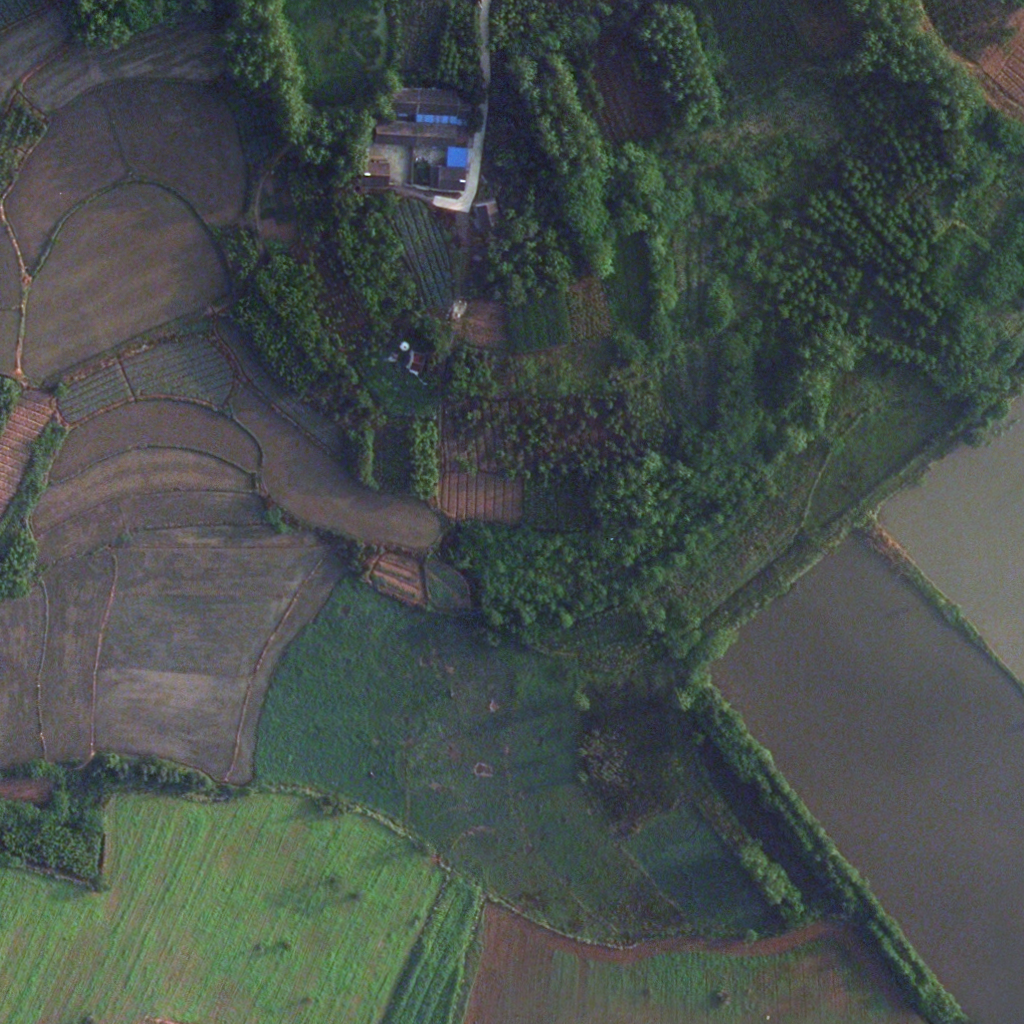

In [16]:
img_torch = torchvision.io.read_image('samples/101.png')
T.ToPILImage()(img_torch)

Transformed image

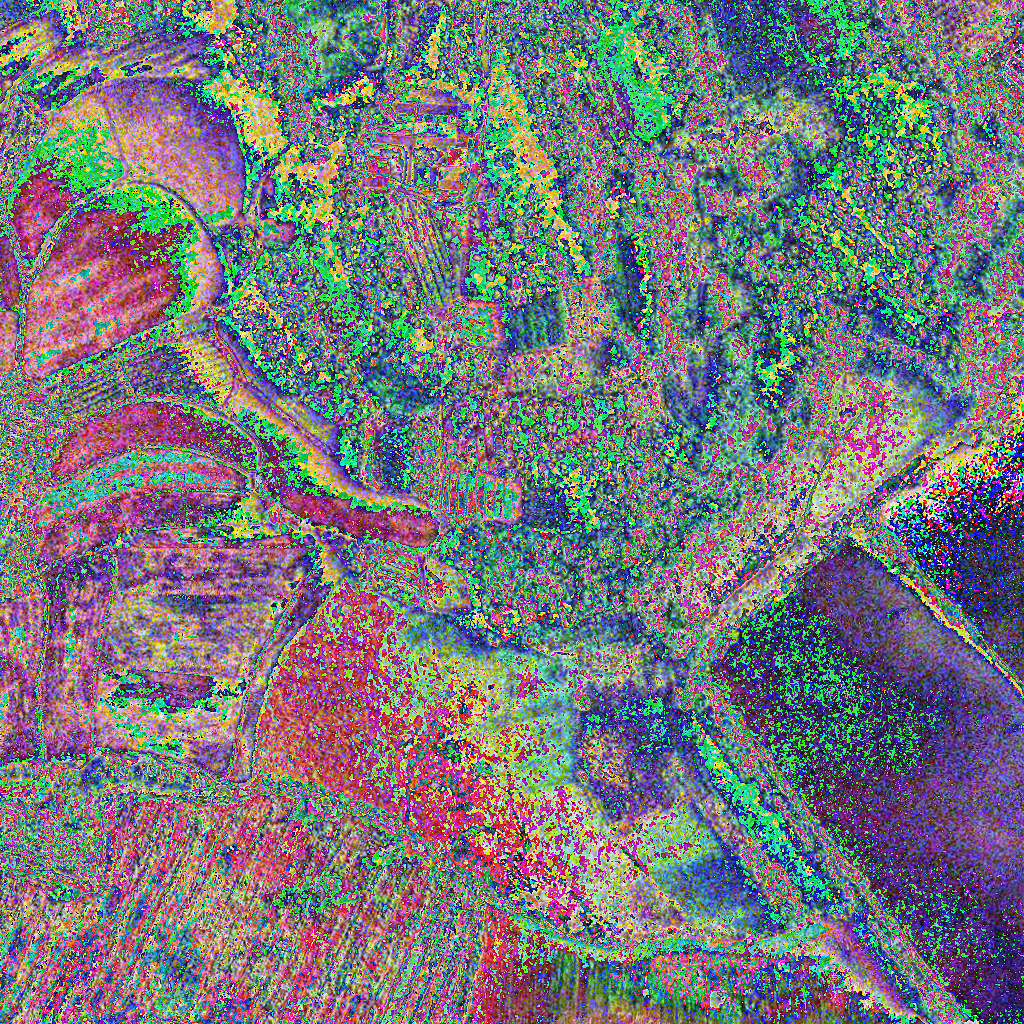

In [17]:
from torchvision.transforms import functional as F

F.to_pil_image(sample_image[0])

**De-normalized**

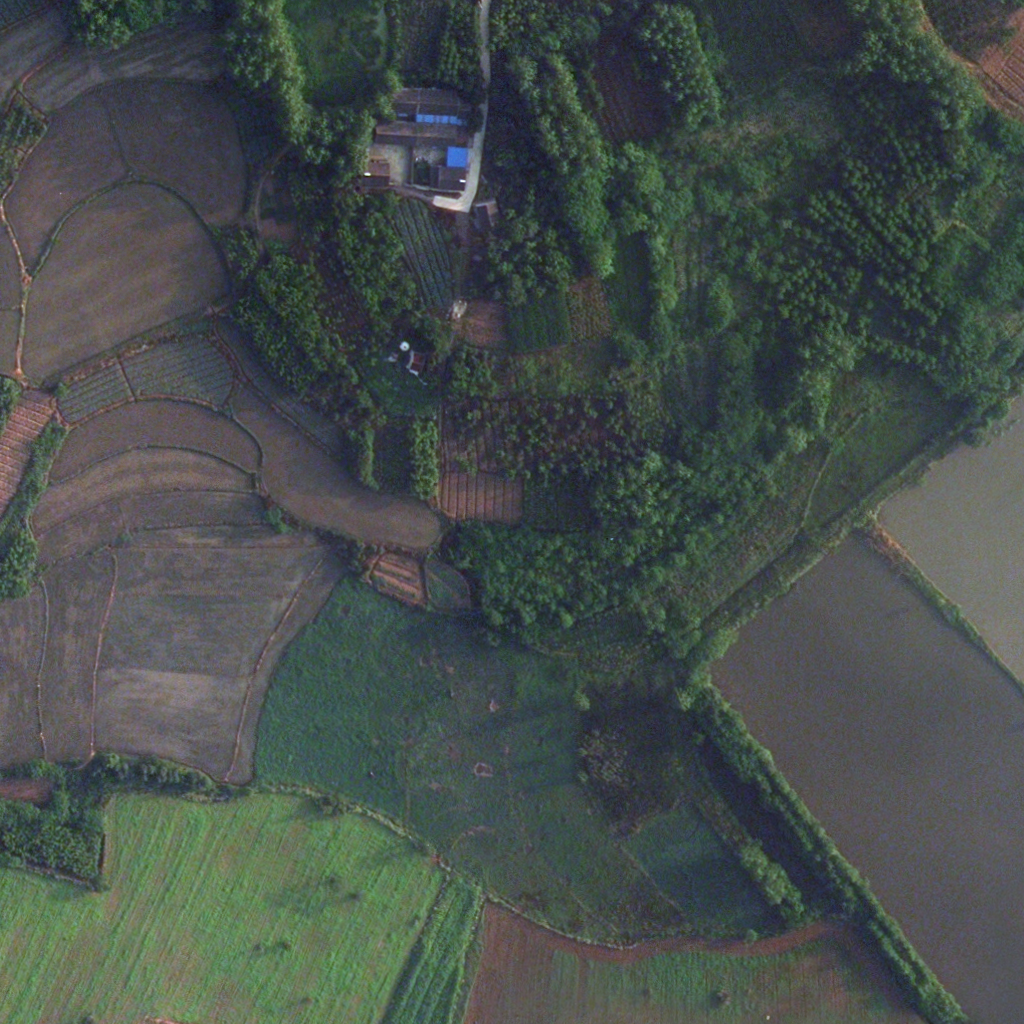

In [18]:
def denormalize(img, mean, std):
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    img = img * std + mean
    return img

de_normalized = denormalize(sample_image[0],mean_std_dict["mean"],mean_std_dict["std"])

F.to_pil_image(de_normalized)